# Exploratory Data Analysis

**The goal:** Use the EDA to identify the most meaningful columns, potential covariations and potentially useful feature engineering strategies

1. Import packages (**done**)
2. Check distribution, datatypes (**done**)
3. Categoricals distribution (**done**)
4. Pivot tables (**done**)
5. Pairgrid/Pairplot (**done**)
6. Correlations (**done**)
7. Final conclusions (**done**) 

### 1. Import packages

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [103]:
#Bring in cleaned up full DB
glassdoorDB = pd.read_csv("/Users/kershtheva/Desktop/Data Science Projects/DS Project 1 Repo/glassdoorFullDBClean.csv")


In [104]:
#Remove extraneous column(s)
glassdoorDB.drop(labels="Unnamed: 0", inplace=True, axis=1)


In [105]:
#Find and remove jobs that don't actually relate to molecular biology
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Banks & Credit Unions']


In [106]:
#Rename a column 
glassdoorDB.rename(columns={'min_size': 'Size', 
                            'min_salary': 'Min Salary',
                            'max_salary':'Max Salary',
                            'Company_Age': 'Company Age', 
                            'Company_Name':'Company Name'}, inplace=True)


### 2. Check datatypes & distribution

In [107]:
glassdoorDB.dtypes

Company Name          object
Headquarters          object
Industry              object
Job Description       object
Job Title             object
Location              object
Rating               float64
Revenue                int64
Type of ownership     object
hourly                 int64
Min Salary             int64
Max Salary             int64
Mean Salary          float64
Company Age            int64
Size                  object
dtype: object

In [108]:
glassdoorDB.describe()

,Rating,Revenue,hourly,Min Salary,Max Salary,Mean Salary,Company Age
count,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,3.750792,2779.610915,0.050176,61.198944,103.933979,82.566461,48.097711
std,0.677596,3989.894329,0.218404,38.991528,51.351308,44.161186,50.657754
min,-1.000000,0.000000,0.000000,11.000000,20.000000,15.500000,0.000000
25%,3.400000,0.000000,0.000000,34.000000,57.000000,45.500000,9.000000
50%,3.800000,50.000000,0.000000,55.000000,99.000000,73.500000,31.000000
75%,4.000000,5000.000000,0.000000,71.000000,145.000000,108.000000,67.000000
max,5.000000,10000.000000,1.000000,167.000000,200.000000,183.500000,239.000000


**Conclusion 1:** Average "Mean Salary" is $82,500, but coefficient of variation is 53%.

In [109]:
#Sort values to look at maximum "Mean Salary"
bestJobs = glassdoorDB.sort_values(by='Mean Salary', ascending=False)[:20]
bestJobs = bestJobs[bestJobs['Mean Salary'] == max(bestJobs['Mean Salary'])]


In [110]:
bestJobs['Company Name'].value_counts()

Moderna Therapeutics                   4
Takeda                                 4
Dicerna Pharmaceuticals, Inc.          2
D. E. Shaw Research                    1
Institute for Creative Technologies    1
Edwards Lifesciences                   1
Progenity                              1
US Department of Veterans Affairs      1
NeoGenomics Laboratories               1
Rubius Therapeutics                    1
Global Blood Therapeutics              1
Siemens Healthineers                   1
Howard Hughes Medical Institute        1
Name: Company Name, dtype: int64

**Conclusion 2:** 20 jobs were in the highest salary bracket. There were no obvious trends to these companies, except for the fact that 40% of them were at either Moderna Therapeutics or Takeda - both companies working on COVID-related projects. Since this is likely a feature that is very context dependent, this feature was left out of the salary prediction model. 

### 3. Categorical distributions

Text(0.5,0.98,'Job Listings vs. State')

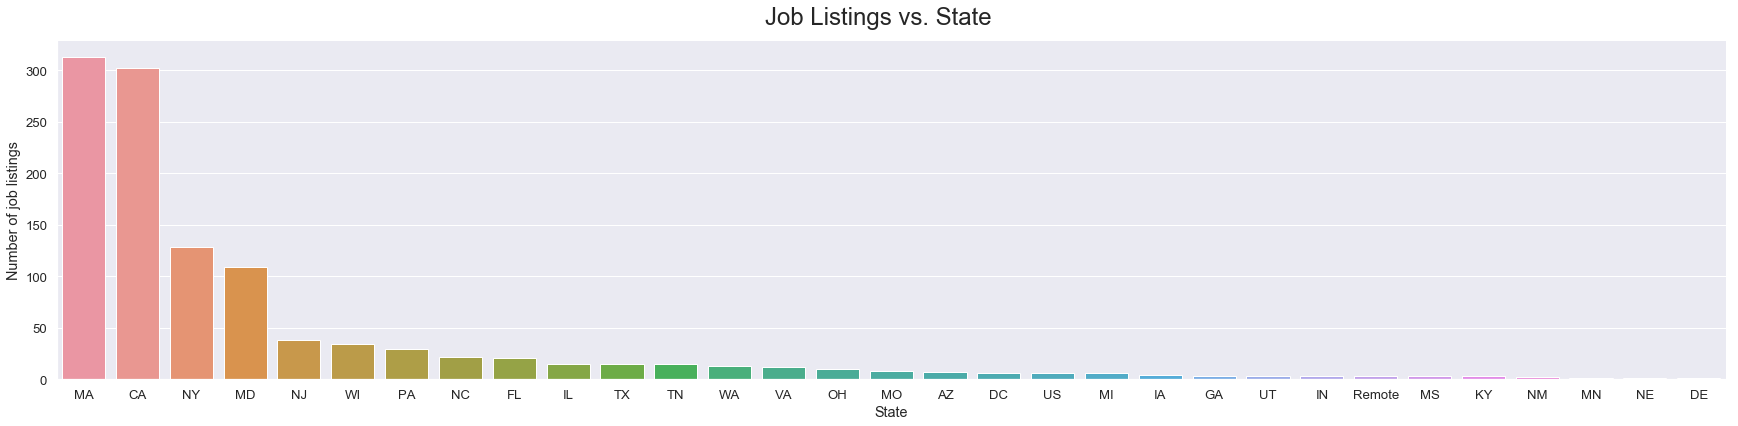

In [111]:
#Make a categorical plot of Number of job listings vs. State
locationCount = sns.catplot(x="Location",data=glassdoorDB, kind = 'count', 
            order = glassdoorDB['Location'].value_counts().index,
            height=6, aspect=4).set_axis_labels('State', 'Number of job listings')

sns.set(font_scale=1.7)
sns.set_style("white")

locationCount.fig.subplots_adjust(top=0.9)
locationCount.fig.suptitle('Job Listings vs. State', fontsize=24)


In [13]:
locationCount.savefig("/Users/kershtheva/Desktop/Data Science Projects/JobsvsState.svg")

**Conclusion 3**: More than half of the jobs are in MA, CA and NY.

In [112]:
#Remove headquarters for companies with foreign headquarters because of few data points
#Group the rest by Mean Salary 

orderedHQ = glassdoorDB.groupby(['Headquarters'], sort=True)['Mean Salary'].apply(lambda x: x.mean()).sort_values(ascending=False)
orderedHQ.drop(labels=['Japan',
                       'Germany', 
                       'Luxembourg', 
                       'France', 
                       'Switzerland',
                       'Australia',
                       'United Kingdom'
                      ], inplace=True)


Text(0.5,0.98,'Mean Salary vs. Location')

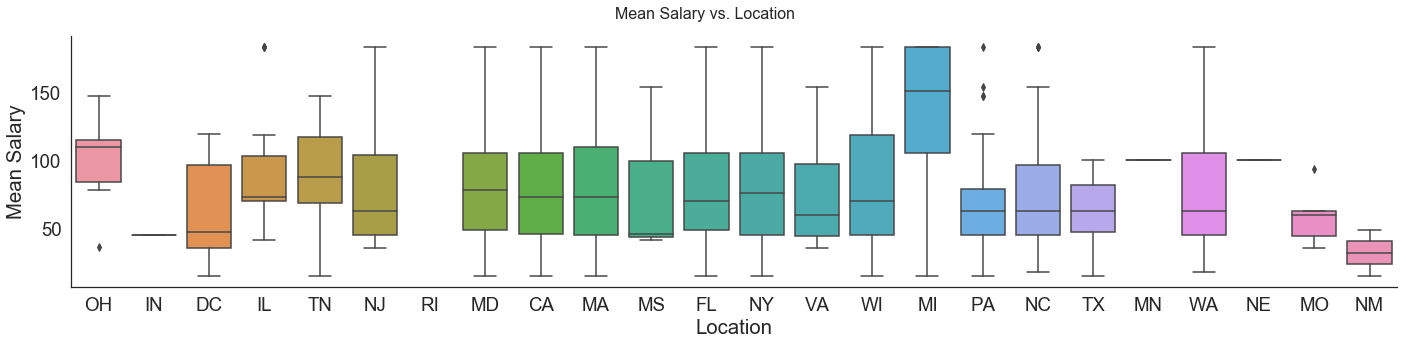

In [113]:
#Obtain an ordered list of locations by average mean salary - add title
locationPlot = sns.catplot(x="Location", y="Mean Salary" , order = orderedHQ.index, data=glassdoorDB, kind = 'box', height=5, aspect=4)
locationPlot.fig.subplots_adjust(top=0.9)
locationPlot.fig.suptitle('Mean Salary vs. Location', fontsize=16)


**Conclusion 4:** Salaries vary greatly across most states, including CA, MA and NY. 

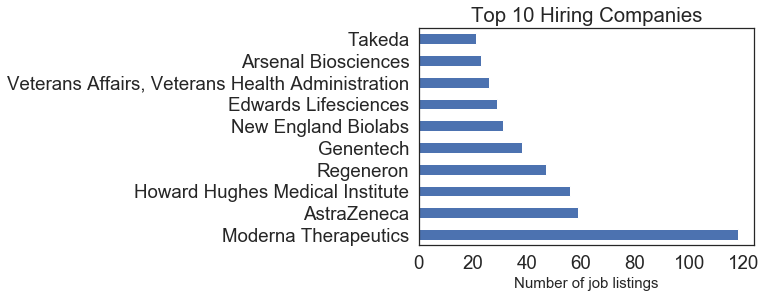

In [114]:
#Sort glassdoorDB by company name count values to find top 10 hiring companies
companyCount = glassdoorDB.pivot_table(index = 'Company Name',
                                       aggfunc='count'
                                      ).sort_values(by='Company Age', ascending=False)

top10 = pd.DataFrame({'Jobs': companyCount['Location'][:10]})
  
#Rename the index to Company Name
top10.index.rename('Company Name', inplace=True)

#Bar plot of top 10 companies
top10Plot = top10.plot(kind='barh', title = 'Top 10 Hiring Companies')

sns.set(font_scale=1.2)
top10Plot.set_xlabel("Number of job listings", size=15)
top10Plot.set_ylabel("", size=15)

top10Plot.set_facecolor("w")
top10Plot.get_legend().remove()


In [19]:
top10Plot.figure.savefig("/Users/kershtheva/Desktop/Data Science Projects/Top10.svg")

**Conclusion 5:** Most jobs are at Moderna. At least 3 companies on this list are involved in COVID-19 vaccine or therapy development. 


### Cleanup (Part 2)

Drop, rename, replace

In [115]:
#Replace values
glassdoorDB['Industry'] = glassdoorDB['Industry'].apply(lambda x: x.replace('Research & Development','Biotech & Pharmaceuticals'))
glassdoorDB['Industry'] = glassdoorDB['Industry'].apply(lambda x: x.replace('Grantmaking Foundations','Colleges & Universities'))
glassdoorDB['Industry'] = glassdoorDB['Industry'].apply(lambda x: x.replace('Education Training Service','Colleges & Universities'))
glassdoorDB['Industry'] = glassdoorDB['Industry'].apply(lambda x: x.replace('Enterprise Software & Network Solutions','Computer Hardware & Software'))
glassdoorDB['Industry'] = glassdoorDB['Industry'].apply(lambda x: x.replace('Staffing & Outsourcing','Biotech & Pharmaceuticals'))
glassdoorDB['Industry'] = glassdoorDB['Industry'].apply(lambda x: x.replace('Social Assistance','Colleges & Universities'))
glassdoorDB['Industry'] = glassdoorDB['Industry'].apply(lambda x: x.replace('Colleges & Universitiess','Colleges & Universities'))


In [116]:
#Remove unneeded rows
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Transportation Equipment Manufacturing']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Internet']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Farm Support Services']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Legal']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Consumer Products Manufacturing']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Consulting']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'IT Services']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Insurance Carriers']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Investment Banking & Asset Management']
glassdoorDB = glassdoorDB[glassdoorDB['Industry'] != 'Aerospace & Defense']


In [18]:
#Include in case further simplification of model for salary prediction is needed

'''
removeJobs = ['CLA/Phlebotomist Lab Outreach - Waukesha - 0.55 FTE, Days', 
              'Head, Program and Alliance Management',
              'MEDICAL TECHNOLOGIST (ADVANCED STAFF)',
              'Informaticist',
              'Supervisor, Tablet Production',
              'Executive Clinical Program Leader, Translational Clinical Oncology',
              'Scientific Researcher, Core Facs Lab',
              'Faculty Biostatistician (Fox Chase Cancer Center)',
              'Gene Therapy Toxicologist',
              'Patent Agent - Life Sciences',
              'Group Leader, Cell Culture (Research Materials Group)',
              'Investigator (In Vivo Pharmacology) Oncology',
              'Cancer Epigenetics Biology Investigator (Oncology)',
             ]

glassdoorDB = glassdoorDB[~glassdoorDB['Job Title'].isin(removeJobs)]
'''

In [118]:
glassdoorDB.head()

,Company Name,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,Type of ownership,hourly,Min Salary,Max Salary,Mean Salary,Company Age,Size
0,Arsenal Biosciences,CA,Biotech & Pharmaceuticals,ArsenalBio’s mission is to develop efficacious...,Scientist - Molecular Biology,CA,5.0,0,Private,0,67,135,101.0,1,51
1,Greenlight Biosciences,MA,Biotech & Pharmaceuticals,GreenLight Biosciences is seeking an exception...,"Scientist, Molecular Biology",MA,3.9,1,Private,0,67,135,101.0,12,51
3,Hygiena,CA,Biotech & Pharmaceuticals,"Since 2001, Hygiena has been on a mission to b...",R&D Scientist,DE,3.9,500,Private,0,67,135,101.0,0,201
4,Regeneron,NY,Biotech & Pharmaceuticals,Known for its scientific and operational excel...,QC Virology Analyst,NY,3.9,10000,Public,0,67,135,101.0,32,5001
5,Howard Hughes Medical Institute,MD,Colleges & Universities,Howard Hughes Medical Institute (HHMI) is an i...,Research Specialist - Torii Lab,TX,4.3,5000,Nonprofit,0,67,135,101.0,67,1001


In [117]:
#Only include non-wage work (55 jobs)
glassdoorDB2 = glassdoorDB[glassdoorDB['hourly'] == 0]


In [119]:
#Simplify size 
glassdoorDB2['Size'] = glassdoorDB2['Size'].apply(lambda x: x.replace('10000+','10000'))


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### 4. Pivot tables

In [120]:
glassdoorDB2.head()

,Company Name,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,Type of ownership,hourly,Min Salary,Max Salary,Mean Salary,Company Age,Size
0,Arsenal Biosciences,CA,Biotech & Pharmaceuticals,ArsenalBio’s mission is to develop efficacious...,Scientist - Molecular Biology,CA,5.0,0,Private,0,67,135,101.0,1,51
1,Greenlight Biosciences,MA,Biotech & Pharmaceuticals,GreenLight Biosciences is seeking an exception...,"Scientist, Molecular Biology",MA,3.9,1,Private,0,67,135,101.0,12,51
3,Hygiena,CA,Biotech & Pharmaceuticals,"Since 2001, Hygiena has been on a mission to b...",R&D Scientist,DE,3.9,500,Private,0,67,135,101.0,0,201
4,Regeneron,NY,Biotech & Pharmaceuticals,Known for its scientific and operational excel...,QC Virology Analyst,NY,3.9,10000,Public,0,67,135,101.0,32,5001
5,Howard Hughes Medical Institute,MD,Colleges & Universities,Howard Hughes Medical Institute (HHMI) is an i...,Research Specialist - Torii Lab,TX,4.3,5000,Nonprofit,0,67,135,101.0,67,1001


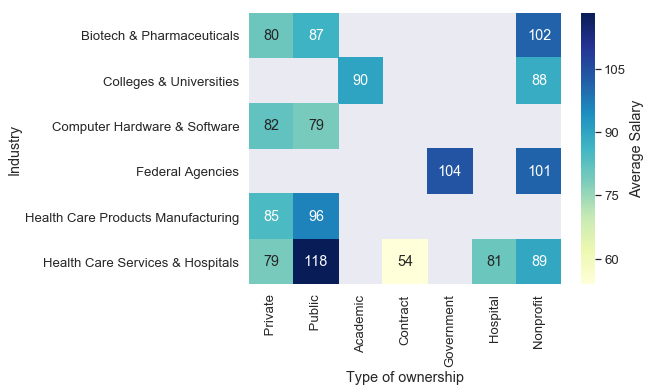

In [121]:
#Look at how the type of ownership and industry "interact" and determine mean salary 
industryDB = glassdoorDB2.pivot_table(index = 'Industry', columns = 'Type of ownership', values = 'Mean Salary')

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(industryDB, cmap = "YlGnBu", annot=True, fmt=".0f", cbar_kws={'label': 'Average Salary'})

**Conclusion 6:** The highest average mean salary is in public companies in "Healthcare Services & Hospitals". The lowest is with contract work in the same industry. The highest average salaries are in public or nonprofit "Type of ownership", such as large pharmaceutical companies or academic institutions. 

### 5. Data distributions (Pairgrid)

Can be done with catplots (using swarm, boxplot, barplot, countplot, pointplot)

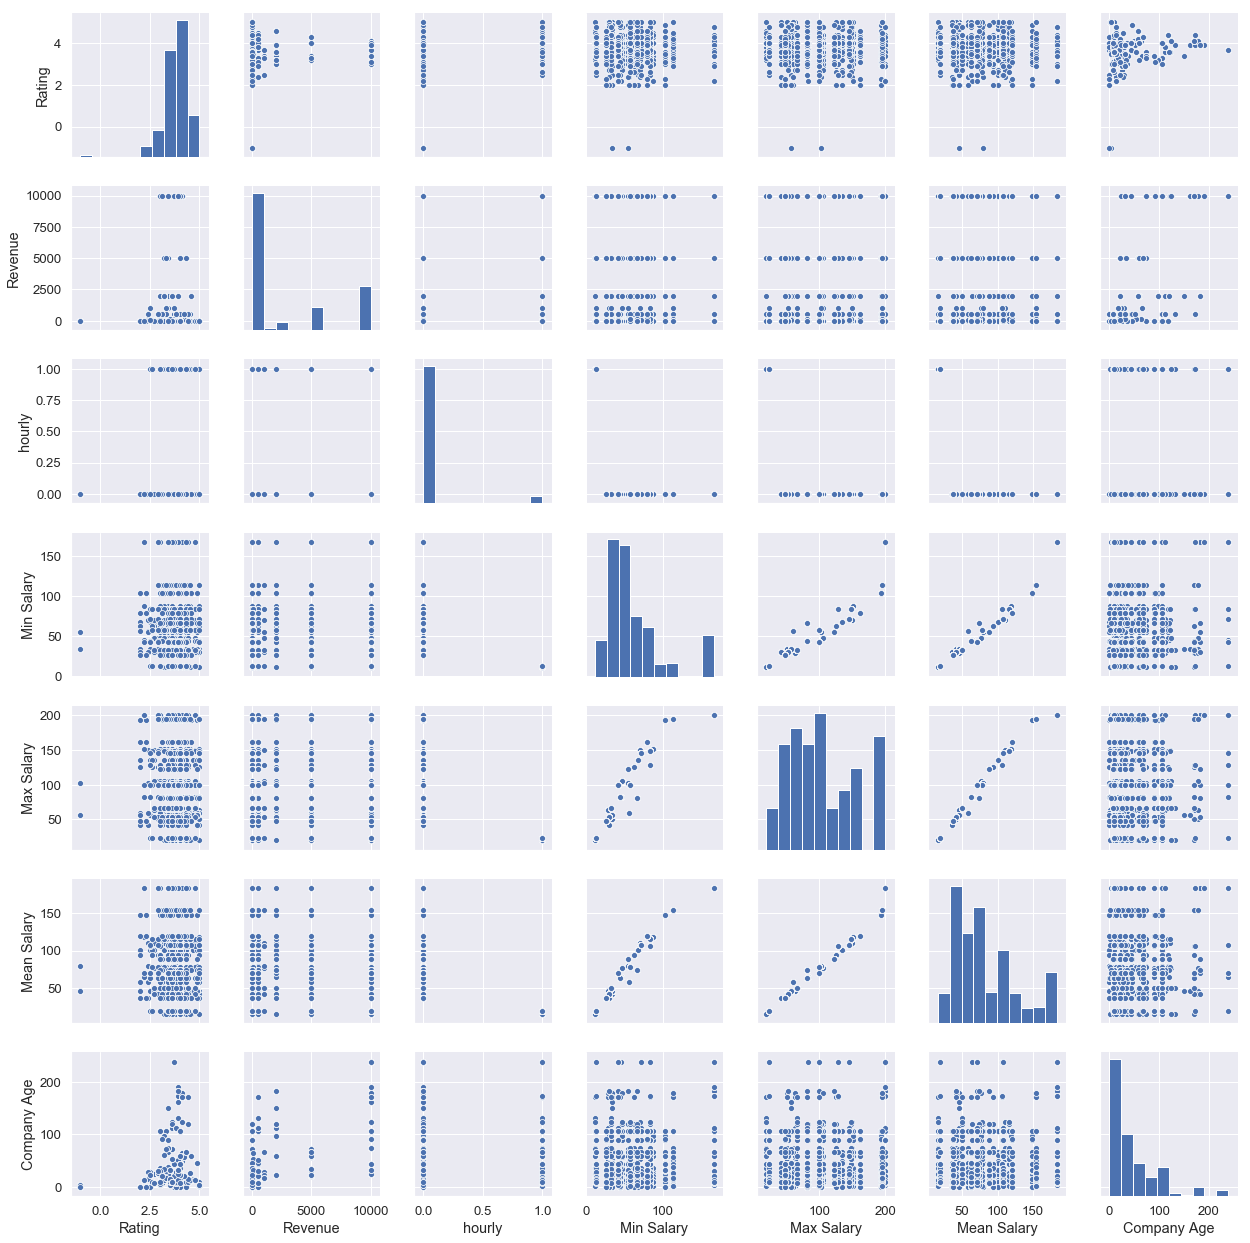

In [122]:
#Plotting histograms for each column for all numerical variables
sns.pairplot(glassdoorDB) 
             
             #vars = ['Rating', 'Revenue', 'Mean Salary', 'Company Age', 'Size'])


**Conclusion 7:** The most obvious relationships are between Company Age vs. Rating and Revenue vs. Rating. 

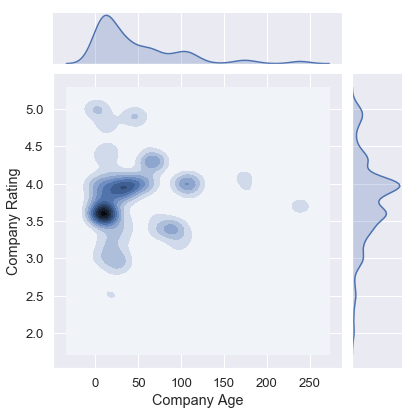

In [123]:
#Make jointplot to show relationship between Company Age and Rating
glassdoorDB = glassdoorDB[glassdoorDB['Rating']!=-1]
ratingsGraph = sns.jointplot(x='Company Age', y='Rating', data=glassdoorDB, kind='kde').set_axis_labels(
    'Company Age', 'Company Rating')
top10Plot.set_facecolor("w")


In [149]:
ratingsGraph.savefig("/Users/kershtheva/Desktop/Data Science Projects/RatingvCompanyAge.svg")

**Conclusion 8:** Rating seems to aggregate towards the mean of 3.75 as the company age increases. 

### 6. Data distributions (Correlations)


In [124]:
glassdoorDB2.columns

Index([u'Company Name', u'Headquarters', u'Industry', u'Job Description',
       u'Job Title', u'Location', u'Rating', u'Revenue', u'Type of ownership',
       u'hourly', u'Min Salary', u'Max Salary', u'Mean Salary', u'Company Age',
       u'Size'],
      dtype='object')

In [136]:
#Create new database with numberical values only for heatmap
newdoorDB = glassdoorDB2.drop(labels=['Company Name', 
                                      'Headquarters', 
                                      'Industry', 
                                      'Job Description',
                                      'Location', 'Min Salary', 'Max Salary',
                                      'Job Title', 
                                      'Type of ownership', 
                                      'hourly'], axis=1)


In [137]:
newdoorDB.columns =  ['Rating', 'Revenue',  'Mean Salary', 'Company Age', 'Size']

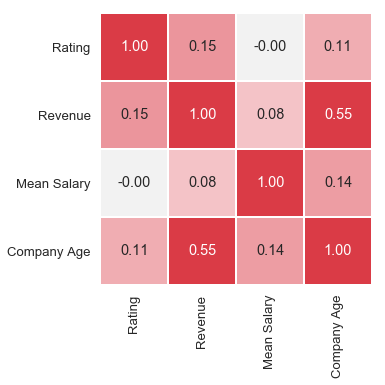

In [138]:
# Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = newdoorDB.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(5,5))

# Draw the heatmap with the mask and correct aspect ratio
corrMap = sns.heatmap(corr,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar=False, annot=True, fmt='0.2f')

In [95]:
corrMap.figure.savefig("/Users/kershtheva/Desktop/Data Science Projects/CorrelationHeatmap.svg")

**Conclusion 9:** No single value here correlates with a Pearson coefficient of more than 0.10. There is a weak correlation between Mean Salary vs. Company Age or Mean Salary vs. Revenue.

**Conclusion 10:** There is a strong correlation (0.55) between Company Age and Revenue. 

### Final cleanup

In [139]:
glassdoorDB2.head()

,Company Name,Headquarters,Industry,Job Description,Job Title,Location,Rating,Revenue,Type of ownership,hourly,Min Salary,Max Salary,Mean Salary,Company Age,Size
0,Arsenal Biosciences,CA,Biotech & Pharmaceuticals,ArsenalBio’s mission is to develop efficacious...,Scientist - Molecular Biology,CA,5.0,0,Private,0,67,135,101.0,1,51
1,Greenlight Biosciences,MA,Biotech & Pharmaceuticals,GreenLight Biosciences is seeking an exception...,"Scientist, Molecular Biology",MA,3.9,1,Private,0,67,135,101.0,12,51
3,Hygiena,CA,Biotech & Pharmaceuticals,"Since 2001, Hygiena has been on a mission to b...",R&D Scientist,DE,3.9,500,Private,0,67,135,101.0,0,201
4,Regeneron,NY,Biotech & Pharmaceuticals,Known for its scientific and operational excel...,QC Virology Analyst,NY,3.9,10000,Public,0,67,135,101.0,32,5001
5,Howard Hughes Medical Institute,MD,Colleges & Universities,Howard Hughes Medical Institute (HHMI) is an i...,Research Specialist - Torii Lab,TX,4.3,5000,Nonprofit,0,67,135,101.0,67,1001


In [140]:
glassdoorDB2.drop(labels = ['Company Name', 
                           'Headquarters', 
                            'Industry',
                            'Type of ownership',
                            'hourly',
                           'Location',
                          ], axis=1, inplace=True)

In [141]:
glassdoorDB2.head()

,Job Description,Job Title,Rating,Revenue,Min Salary,Max Salary,Mean Salary,Company Age,Size
0,ArsenalBio’s mission is to develop efficacious...,Scientist - Molecular Biology,5.0,0,67,135,101.0,1,51
1,GreenLight Biosciences is seeking an exception...,"Scientist, Molecular Biology",3.9,1,67,135,101.0,12,51
3,"Since 2001, Hygiena has been on a mission to b...",R&D Scientist,3.9,500,67,135,101.0,0,201
4,Known for its scientific and operational excel...,QC Virology Analyst,3.9,10000,67,135,101.0,32,5001
5,Howard Hughes Medical Institute (HHMI) is an i...,Research Specialist - Torii Lab,4.3,5000,67,135,101.0,67,1001


In [142]:
glassdoorDB2.dtypes

Job Description     object
Job Title           object
Rating             float64
Revenue              int64
Min Salary           int64
Max Salary           int64
Mean Salary        float64
Company Age          int64
Size                object
dtype: object

In [143]:
#Convert 'Size' to an int
glassdoorDB2['Size'] = glassdoorDB2['Size'].astype(int)


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [144]:
#Save the csv file
glassdoorDB2.to_csv("/Users/kershtheva/Desktop/Data Science Projects/DS Project 1 Repo/glassdoorDB_postEDA.csv")


### 7. Conclusions Summary

1. Average "Mean Salary" is $82,500, but coefficient of variation is 53%.

2. 40% of the top paying jobs were at either Moderna Therapeutics or Takeda.

3. More than half of the jobs are in MA, CA and NY.

4. Salaries vary greatly across most states, including CA, MA and NY.

5. More than 10% of job listings were from Moderna. 

6. The highest average mean salary is in public companies in "Healthcare Services & Hospitals".

7. The most obvious relationships are between Company Age vs. Rating and Revenue vs. Rating.

8. Rating seems to aggregate towards the mean of 3.75 as the company age increases.

9. There is a weak correlation between Mean Salary vs. Company Age or Mean Salary vs. Revenue.

10. There is a strong correlation (0.55) between Company Age and Revenue.